# Final Project Title

## Team Members

- Gökberk Abdullah, abdullahg17@itu.edu.tr, 090170341
- İbrahim Talha Özdemir, ozdemiri18@itu.edu.tr, 090180309

## Data Set Introduction

- Give some technical information or a brief story about the data set you used in this project which will motivate the reader.
- Introduce your data set and variables in detail here (for example, you may have numerical, nominal, ordinal features along with possible missing values etc). 
- Please do not forget to give the reference of the place where you obtained the data set from.

TMDB 5000 Movie Dataset is a dataset prepared by the Open Movie Database that contains information about approximately 5000 movies. For each movie, many features such as title, budget, box office revenue, genre, language, country, director, cast and rating are recorded.

This dataset is particularly valuable for film recommendation systems and data science. It contains a lot of information about the features of movies and can be used to compare different movies. Therefore, this dataset is widely used in many machine learning projects, such as film recommendation systems.

The first dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:-

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count - the count of votes recieved.

In [5]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

In [6]:
file_path = os.path.join("Datasets", "tmdb_5000_credits.csv")
ratings = pd.read_csv(file_path)

file_path = os.path.join("Datasets", "tmdb_5000_movies.csv")
movies = pd.read_csv(file_path)
ratings.columns = ['id','tittle','cast','crew']
data= movies.merge(ratings,on='id')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [157]:
data.drop(columns=['homepage', 'tagline'], inplace=True) # We have dropped homepage and tagline becasue they have no effect on our system and they have large number of null values.

In [154]:
data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
tittle                  0
cast                    0
crew                    0
dtype: int64

In [98]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

NUMERICAL FEATURES: budget, id, popularity, revenue, runtime, vote_average, vote_count are numerical features.

## Description of the Problem

- Tell us about the possible questions you are interested in this data set. 
  - You may want to build a regression model to predict a continuous variable based on a set of features and try to find a good model for this data set by fitting several different models and comparing the performance of the models on this data set.
  - You may want to build a classfier to predict a binary/multi-class variable based on a set of features and try to find a good model for this data set by fitting several different classifiers and comparing the performance of the models on this data set.
  - You may have high-dimensional features (too many features) and want to reduce the dimension of features prior to model building etc.

We want to develop an interesting and useful project such as movie recommendation systems using this dataset.

Which algorithms are most suitable and effective for the movie recommendation system? How good is the performance of these algorithms?

What information can the movie recommendation system use about other movies users have watched and their viewing history? How can the impact of this information be measured?

Our aim is to find answers to these questions.

## Data Exploration
- Tell us about the descriptive approaches you have done to explore your data set.
   - Some basic descriptive statistics
   - Some visualizations that will open a door/insight for your questions.
- Please, whenever you present a result/visualization here, interpret it. If you are not planning to interpret it, do not include it here either.

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In this table we can see numerical features values. 

One of the essential features in our dataset is the 'genres' feature, which is given in a highly mixed format. To simplify it, we use the JSON library to extract only the movie genres mentioned alongside the name within the feature. Then, we create a column graph to visualize the counts of movie genres.

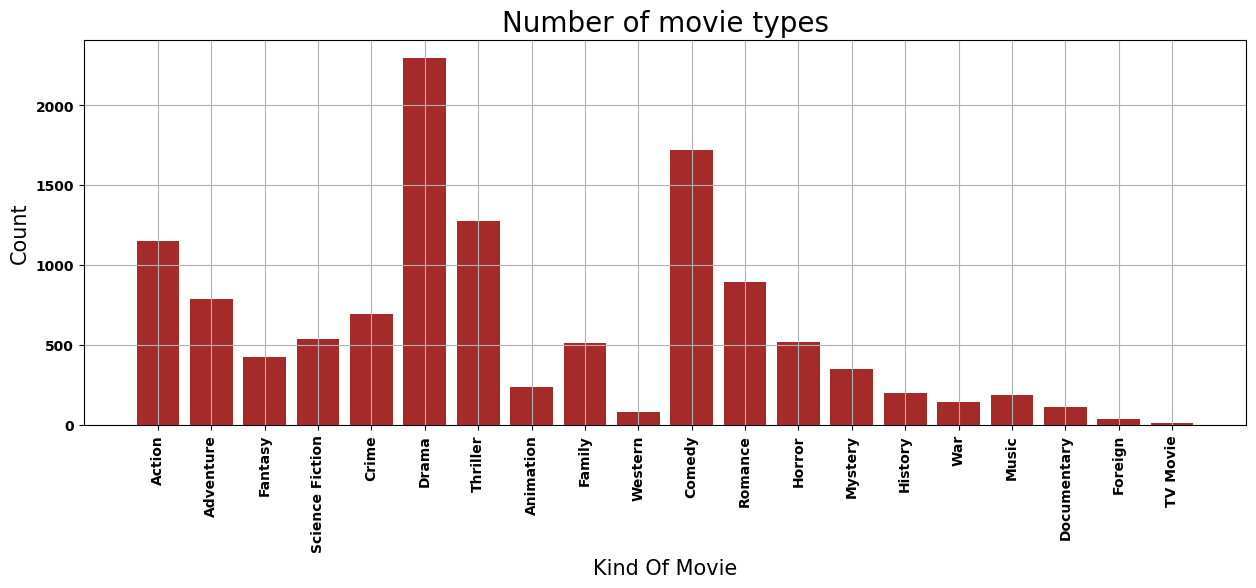

In [161]:
import json
genre_arr=[]
for json_obj_arr_str in data["genres"]:
    genre_obj_arr=json.loads(json_obj_arr_str) 
    for j in range(len(genre_obj_arr)):
        genre_arr.append(genre_obj_arr[j]["name"])
genre_df=pd.DataFrame(genre_arr, columns = ['genres']) 


from collections import Counter
genre_count_dict=Counter(genre_df["genres"]) 
genre_name=[]
genre_count=[]


for genre in genre_count_dict:
    genre_name.append(genre) 
    genre_count.append(genre_count_dict[genre]) 
#visualization using bar graph
plt.figure( figsize = (15,5))
plt.bar(genre_name,genre_count,color ='brown')
plt.xticks(rotation = 90)
plt.xlabel("Kind Of Movie",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Number of movie types",fontsize = 20)
plt.grid()
plt.show()

By examining this graph, we can investigate whether there is a correlation between popularity and the budget spent on making the film. If you observe that popularity does not increase as the budget increases, it suggests that there might not be a strong positive correlation between these two variables. This means that the budget spent on making a film does not necessarily guarantee higher popularity.

<AxesSubplot:title={'center':'Popularity vs Budget'}, xlabel='popularity', ylabel='budget'>

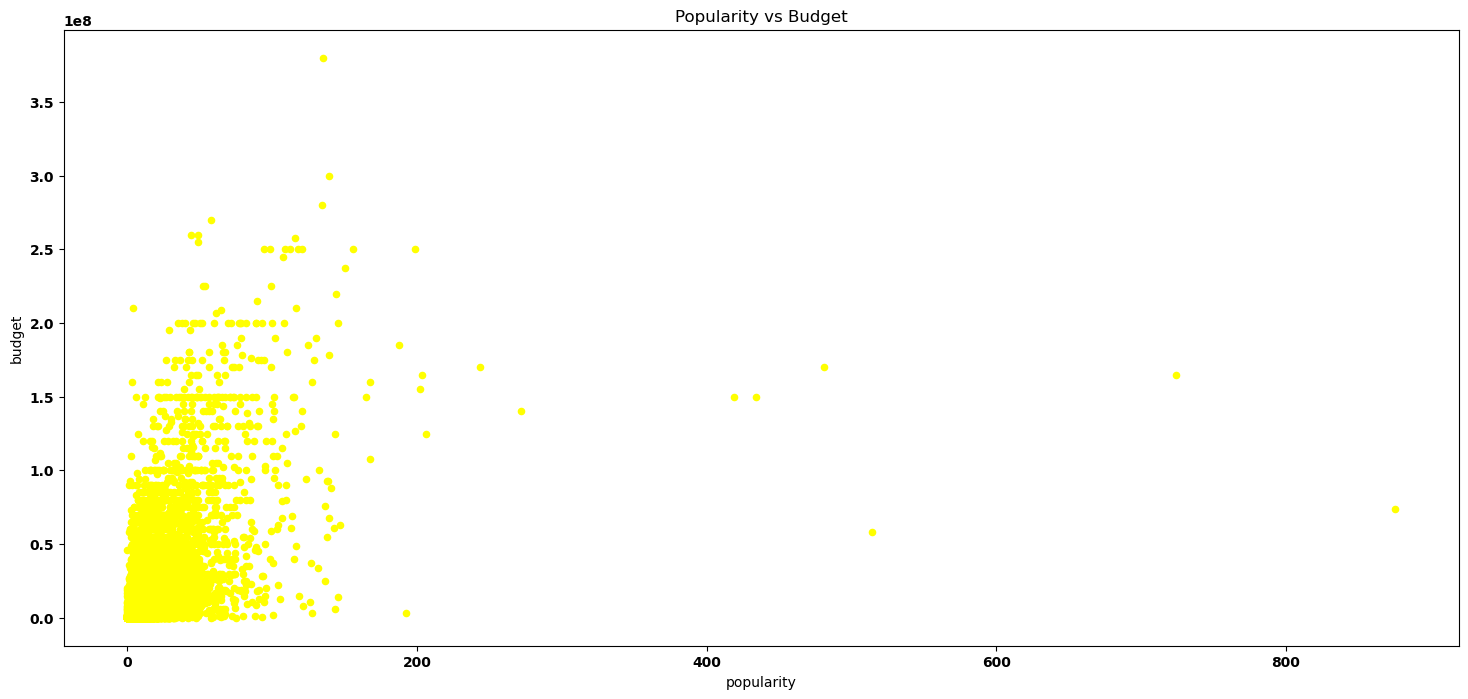

In [162]:
data.plot(x='popularity',y='budget',kind='scatter',title="Popularity vs Budget", color='yellow')

By examining this graph, we can investigate the relationship between the budget and the average rating of the film. From this, we can infer that the rating of a film does not always increase as the budget increases. Additionally, it suggests that low-budget films can still have high ratings.

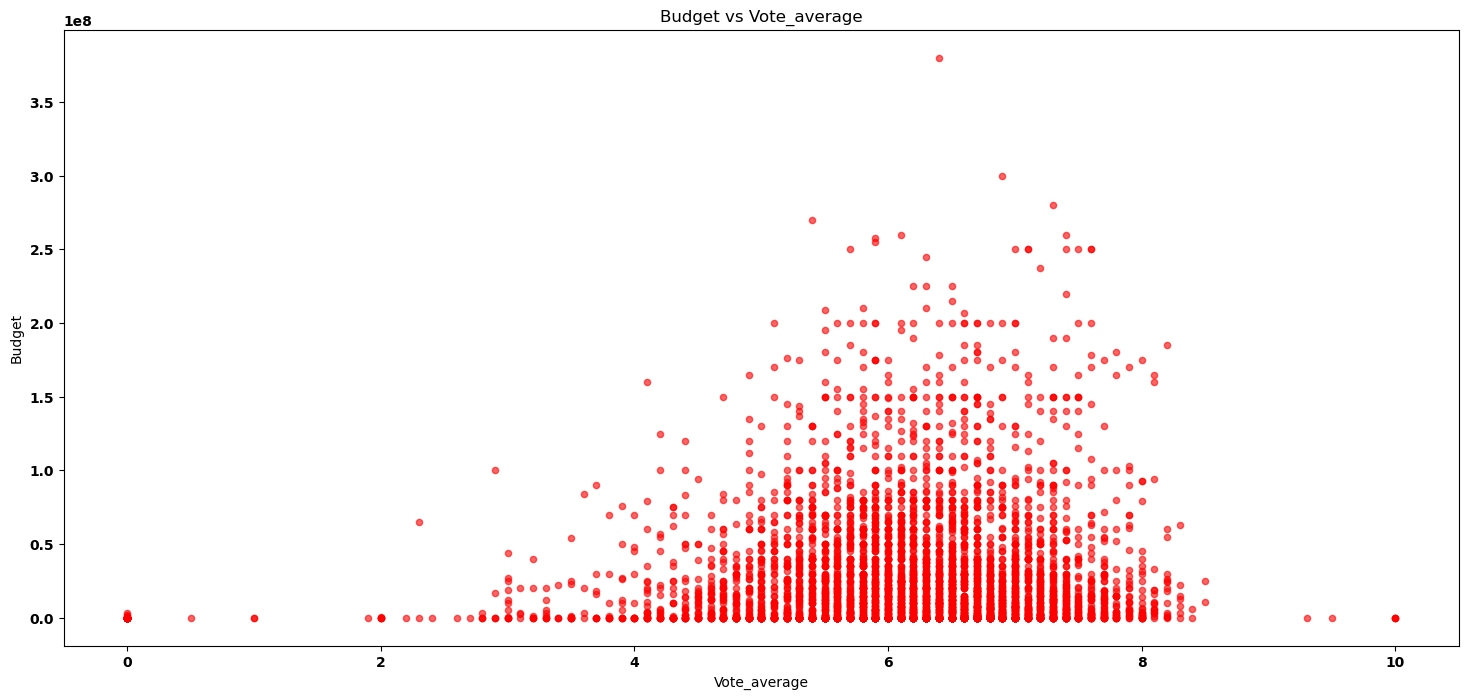

In [147]:

data.plot(kind='scatter', x='vote_average', y='budget', alpha=.6, color='r')
plt.xlabel('Vote_average')
plt.ylabel('Budget')
plt.title('Budget vs Vote_average')
plt.show()

In this graph, we can examine the budgets and revenues of the head 25 films in our dataset. From this, we can observe that some films incurred losses, some films broke even, and some films, like the movie "Avatar," generated significantly higher revenues compared to their budgets.

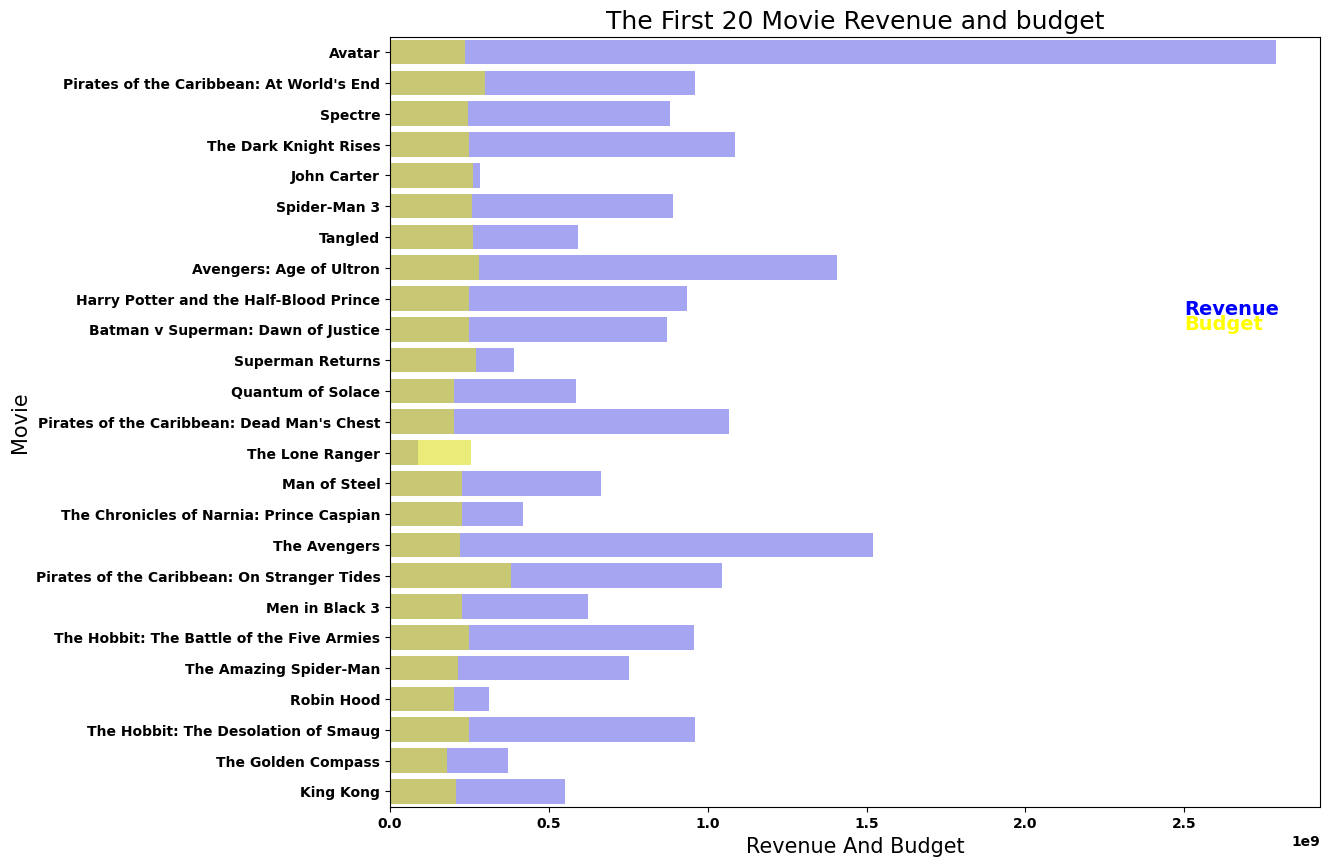

In [136]:
 
plt.figure(figsize = (12,10))
sns.barplot(x = "revenue",y= "original_title", data=  data.head(25),color="blue",alpha=0.4,label="Revenue")
sns.barplot(x = "budget", y = "original_title",data= data.head(25),color= "yellow", alpha=0.6,label ="Budget")
plt.text(2500000000,8.5,"Revenue",color="blue",fontsize = 14 )
plt.text(2500000000,9,"Budget", color="yellow",  fontsize = 14 )
plt.xlabel("Revenue And Budget",fontsize= 15)
plt.ylabel("Movie",fontsize= 15)
plt.title("The First 20 Movie Revenue and budget",fontsize = 18)
plt.show()

In this visualization, we have a pie chart representing the countries where the movies in the dataset were produced. The purpose of including this chart is to highlight the fact that a significant majority of the movies listed on IMDb are produced in the United States. This observation suggests that a recommendation system based solely on this dataset may not provide satisfactory recommendations for users from countries such as India or China, which have a relatively smaller representation in terms of movie production.

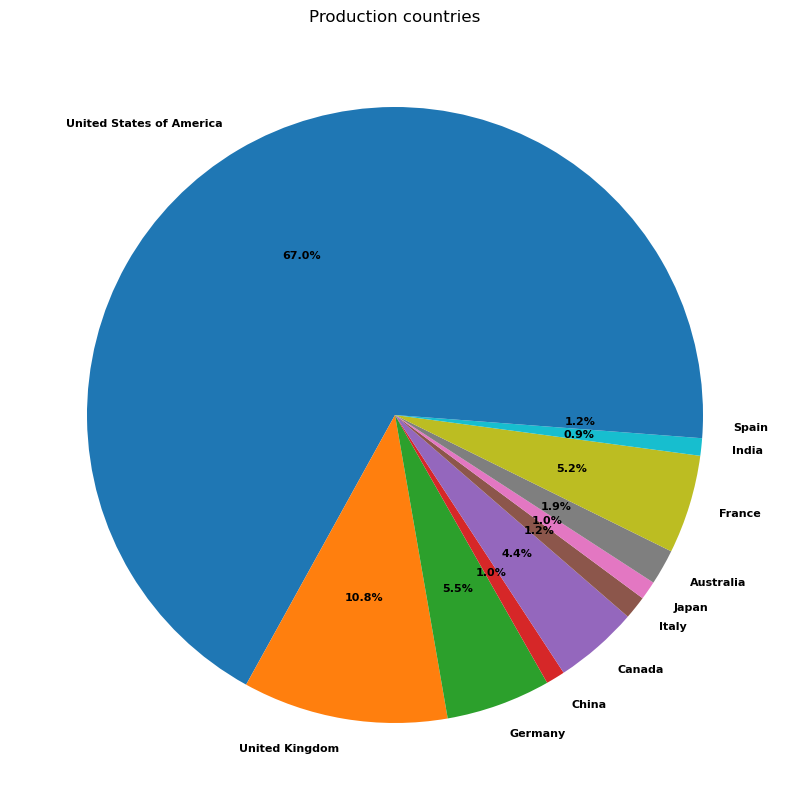

In [148]:
 

prod_countries_arr=[]
for string in data["production_countries"]:
    prod_coun_obj=json.loads(string) 
    for j in range(len(prod_coun_obj)):
        prod_countries_arr.append(prod_coun_obj[j]["name"])
countries_df=pd.DataFrame(prod_countries_arr,columns=['countries'])
countries_count_dict=Counter(countries_df["countries"])
countries_name=[]
countries_count=[]


for country_name in countries_count_dict:
    if(countries_count_dict[country_name]>50):
        countries_name.append(country_name)
        countries_count.append(countries_count_dict[country_name])
labels = countries_name
colors = sns.color_palette()
sizes= countries_count


plt.figure(figsize = (10,10))
plt.title('Production countries')
plt.pie(sizes,labels=labels,colors = colors,autopct='%1.1f%%',textprops= {"fontsize": 8},shadow = False)
plt.show()
 

Using the JSON library on columns that contain complex data allows us to simplify the representation of the data and make our dataset more readable. The reason for doing this is to address any potential error messages or warnings encountered when working with the dataset.

In [149]:

json_columns = {'cast', 'crew', 'genres', 'keywords', 'production_countries', 
                'production_companies', 'spoken_languages'}

for c in json_columns:
    data[c] = data[c].apply(json.loads)
    if c != "crew": 
        data[c] = data[c].apply(lambda row: [x["name"] for x in row])

In [150]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


This graph represents the keywords present in the dataset and their respective occurrence counts. Keywords play an important role in establishing a connection between the movies users have watched and the ones that are recommended to them. Many people rely on entering these keywords alone on online movie streaming platforms to discover movies they might like.

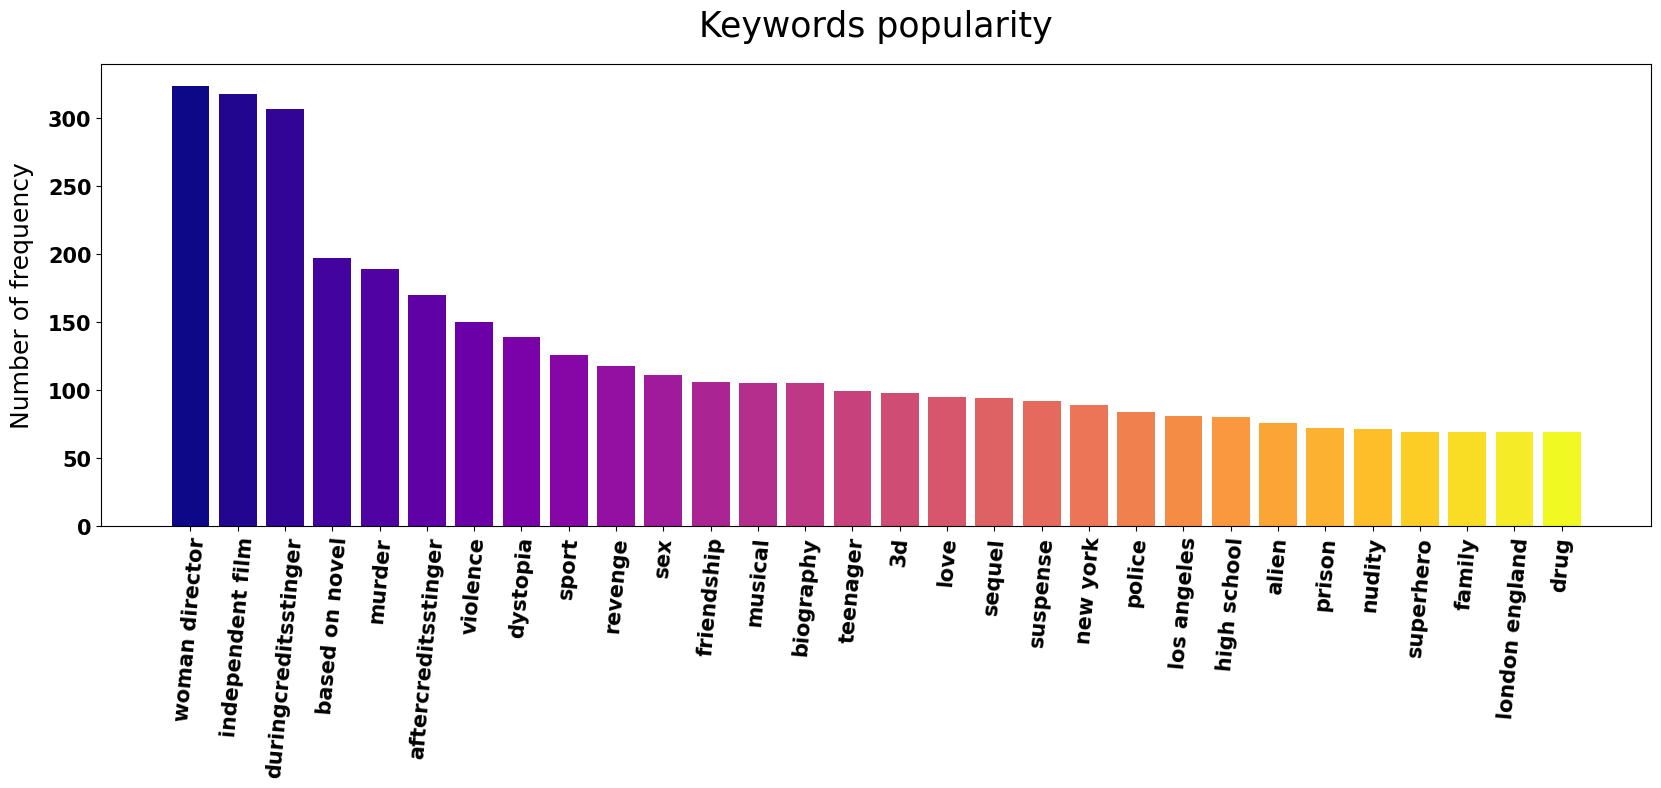

In [151]:
top_keywords_num = 30
keywords_flatten = sum(data["keywords"].values, []) 
keywords_info = Counter(keywords_flatten)
top_keywords = dict(keywords_info.most_common(top_keywords_num))

plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of frequency", fontsize=18, labelpad=10)
plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)
plt.title("Keywords popularity", fontsize=25, pad=20)
plt.show()

In [152]:
multicol = data.corr().round(4)
multicol

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.0000,-0.0894,0.5054,0.7308,0.2699,0.0931,0.5932
id,-0.0894,1.0000,0.0312,-0.0504,-0.1535,-0.2706,-0.0041
popularity,0.5054,0.0312,1.0000,0.6447,0.2255,0.2740,0.7781
revenue,0.7308,-0.0504,0.6447,1.0000,0.2511,0.1971,0.7815
runtime,0.2699,-0.1535,0.2255,0.2511,1.0000,0.3750,0.2719
vote_average,0.0931,-0.2706,0.2740,0.1971,0.3750,1.0000,0.3130
vote_count,0.5932,-0.0041,0.7781,0.7815,0.2719,0.3130,1.0000


The table and the heatmap below allow us to examine the correlations between features. By analyzing the correlations, we can identify relationships and dependencies between different features in the dataset.



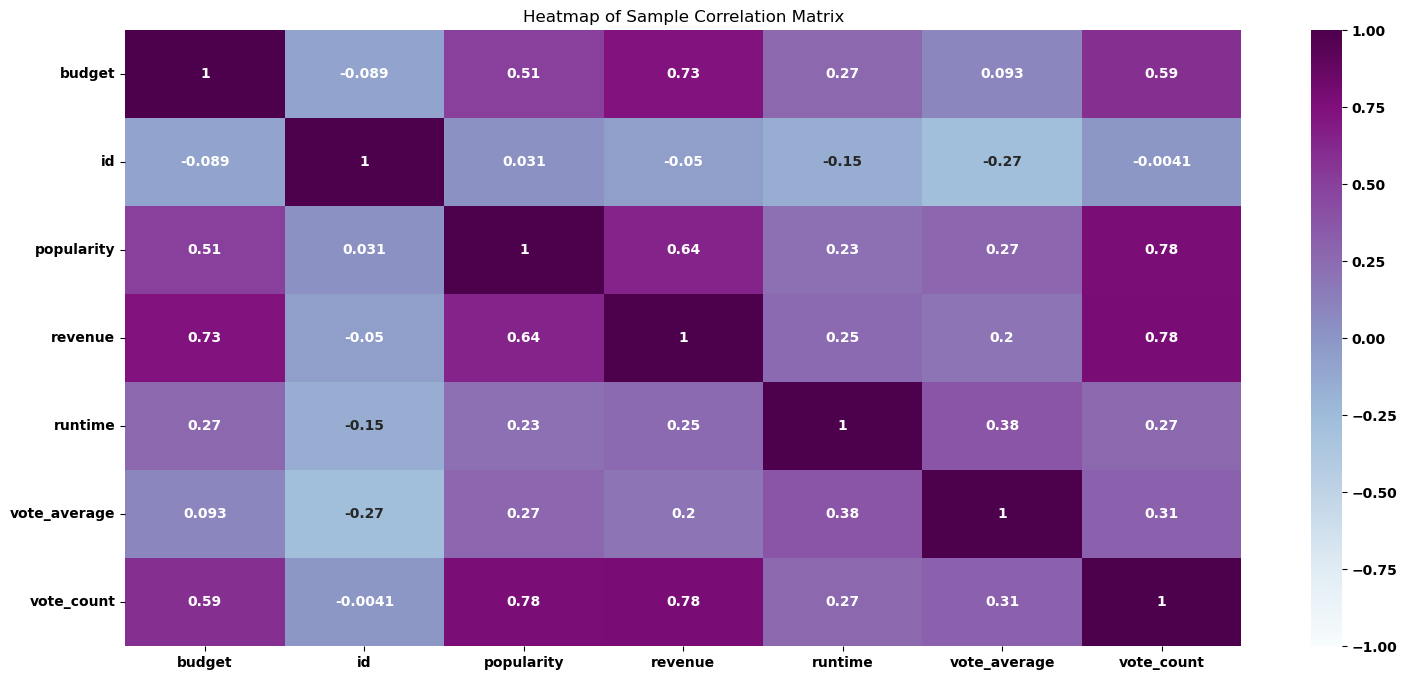

In [112]:

plt.rcParams['figure.figsize'] = [18, 8]

sns.heatmap(multicol, cmap='BuPu', annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

## Methodologies

- Tell us about data pre-processing approaches you have done (if you have done any).
- Tells us about the methodologies you have done to find answer to your research problems defined above.

First, we performed data cleaning as our dataset consisted of non-numeric values and the features had mixed content. This was our top priority. Then, we examined the correlations between features using a heatmap. We created various visualizations to understand the relationships between features. While doing so, we discovered parts of the dataset that required cleaning and performed data cleaning again. Finally, we prepared our dataset to be suitable for applying algorithms.


We tried used three different methods in our project: Demographic Filtering, Content-Based Filtering, and Collaborative Filtering.

Demographic Filtering method relies on filtering movies based on demographic features such as age, gender, profession, etc. It is used to rank movies from popular movies that appeal to a broad audience to movies that target smaller audiences.

Content-Based Filtering method relies on recommending similar movies based on their features such as genre, director, actors, etc. It recommends other movies with similar features by analyzing a user's past movie preferences.

Collaborative Filtering method relies on recommending movies based on the preferences of similar users and movies. It recommends movies chosen by similar users by analyzing a user's past movie preferences. But our dataset does not have userbased past movie preferences. So we couldn't use this methodology.

These three methods aim to classify movies from different perspectives and recommend movies based on different features to provide users with a better movie recommendation experienc

 First we write algorithm for content based filtering. The algorithm analyzes the content-related features of movies, such as genres, keywords, cast, crew, and other relevant information. It aims to understand the intrinsic properties of each movie. Calculates the similarity between each movie and the user profile. Finally give recommendations according to given movie name.

In [8]:
#CONTENT BASED FILTERİNG
data['overview'] = data['overview'].fillna('')


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])

In [9]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [10]:
def contentbased_filtering(title, cosine_sim=cosine_sim, data=data):
    
    indices = pd.Series(data.index, index=data['title']).drop_duplicates()
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]

    return data['title'].iloc[movie_indices]

 Then we write algorith for demographic filtering. The algorithm analyzes the popularity indicators of movies, such as IMDb ratings, vote counts, box office revenues, or other metrics. It identifies movies that have high overall popularity or widespread appeal among the general audience. The algorithm prioritizes movies that have performed well in terms of popularity indicators within a particular demographic segment. In the end algorithm gives recommendations based on popularity for a given movie name.

In [11]:
#DEMOGRAPHIC FİLTERİNG
def demographic_filtering():
    C = data['vote_average'].mean()
    m = data['vote_count'].quantile(0.9)
    def weighted_rating(x, m=m, C=C):
        v = x['vote_count']
        R = x['vote_average']
        
        return (v/(v+m) * R) + (m/(m+v) * C)
    qualified_movies = data[(data['vote_count'] >= m) & (data['vote_count'].notnull()) & (data['vote_average'].notnull())]
    qualified_movies['weighted_rating'] = qualified_movies.apply(weighted_rating, args=(C, m), axis=1)
    top_10_movies = qualified_movies.sort_values('weighted_rating', ascending=False).head(10)
    return top_10_movies['title']

## Results


In conclusion, our algorithm provides 10 movie recommendations for both content-based filtering and demographic filtering based on the given movie name. One notable observation is that content-based filtering appears to be more successful, which becomes evident after conducting several experiments. The main reason for this is that demographic filtering relies on factors such as IMDB ratings, vote counts, and ratings, resulting in similar recommendations for many movies. On the other hand, content-based filtering generates recommendations that vary after each input, as it suggests movies with similar or related themes to the given movie. Therefore, content-based filtering is more effective and practical as it suggests movies based on the subject matter or similar themes of the input movie.

In [14]:
# IN HERE USER ENTER A FILM NAME
movie_input = input("Please type the name of a movie you like: ")


content_based_movies = contentbased_filtering(movie_input)
print("Content-based filtering recommendations:")
print(content_based_movies)


demographic_movies = demographic_filtering()
print("\nDemographic filtering recommendations:")
print(demographic_movies)

Please type the name of a movie you like:  The Martian


Content-based filtering recommendations:
373                  Mission to Mars
487                       Red Planet
1507                           Alive
3158                           Alien
1198        Escape from Planet Earth
2964           The Last Days on Mars
91      Independence Day: Resurgence
635                        Apollo 13
3993               Journey to Saturn
1735                  Ghosts of Mars
Name: title, dtype: object

Demographic filtering recommendations:
1405             The Pianist
2247       Princess Mononoke
1987    Howl's Moving Castle
3940                  Oldboy
1819                The Help
4602            12 Angry Men
1525          Apocalypse Now
2585         The Hurt Locker
2862              About Time
583                 Big Fish
Name: title, dtype: object


C:\Users\Asus\AppData\Local\Temp\ipykernel_16164\1812532657.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_movies['weighted_rating'] = qualified_movies.apply(weighted_rating, args=(C, m), axis=1)


## Conclusion
-In summary, after examining the IMDb dataset, we identified its deficiencies and areas that needed correction, and proceeded with data cleaning. This involved cleaning and organizing the necessary features. We then conducted data visualization using various features to gain more insights about the dataset. Next, we discussed different methodologies and conducted experiments related to them.

-Content-based filtering and demographic filtering were chosen for comparison in the project. After implementing the algorithms, we conducted multiple iterations to test their performance. Upon comparing the results, content-based filtering was found to be more successful and useful. This is because it provides recommendations based on the similarity between movies, offering diverse and personalized suggestions. On the other hand, demographic filtering primarily relies on popularity and ratings, leading to similar recommendations for many movies.

-As the next step of the project, collaborative filtering can be implemented by adding user IDs and movie viewing history, which would enhance the recommendation system. Collaborative filtering takes into account the preferences and behavior of individual users, resulting in a more effective and personalized recommendation approach.

## Work Distribution

- Tell us about the work distribution among the team members. Please state the contribution with a percantage.

- Task 1 Researching datasets and choosing topic. Gökberk %50 İbrahim Talha %50
- Task 2 Preparing proposal Gökberk %50 İbrahim Talha %50
- Task 3 Data Preparing and Cleaning Gökberk %50 İbrahim Talha %50
- Task 4 Data Visualization Gökberk %25 İbrahim Talha %75
- Task 5 Using Methodologies Gökberk %75 İbrahim Talha %25
- Task 6 Evaluating Result Gökberk %50 İbrahim Talha %50
- Task 7 Preparing Presentation Gökberk %25 İbrahim Talha %75

## References

- Dataset link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
- https://towardsdatascience.com/how-machine-learning-recommends-movies-for-you-6f418f26bcb2

## Additional Folders

If this document involves datasets and images, please keep them in datasets and img folders, respectively. Please, be sure that your project is REPRODUCIBLE. Otherwise, it may not be graded.